# Setup and Initialization

##Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.gridspec as gridspec
from collections import Counter
import plotly.graph_objects as go
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from tabulate import tabulate

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Initialize Plotly for use in the notebook
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [ ]:
# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': '#dfedfa'}, style='darkgrid')

##Load Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Learn Data/Project Case Study/Customer Segmentation & Recommendation System/Superstore.csv', encoding='windows-1252')

# Initial Data Analysis

## Dataset Overview

In [ ]:
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2011-115812,09-06-2011,14-06-2011,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2011-115812,09-06-2011,14-06-2011,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2011-115812,09-06-2011,14-06-2011,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2011-115812,09-06-2011,14-06-2011,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2011-115812,09-06-2011,14-06-2011,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [ ]:
df.drop(columns=['Row ID'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount

The dataset consists of 9994 rows and 20 columns, here is a brief overview of each column:
- **Order ID** : An object column that contains the order number for each transaction. Each order number can represent multiple items
- **Order Date** : A datetime column that records the date of each transaction
- **Ship Date** : A datetime column that records the date of shipping items each transaction
- **Ship Mode** : An object data type columns that contains the type of shipping mode class used
- **Customer ID** : An object column that contains customer id for each transaction. Each customer number can represent multiple items
- **Customer Name** : An object column that contains customer name
- **Segment** : An object column that contains customer segments who purchased items
- **Country, City, State, Postal Code, Region** : The columns that contains customer geographic information
- **Product ID** : An object column that contains product number id. Each customer can have several product IDs for the items purchased
- **Category, Sub-Category, Product Name** : The object column contains the category and name of the item purchased
- **Sales** : A float column that contains the total purchase price of the item
- **Quantity** : A integer column that contains the number of items purchased
- **Discount** : A float column that contains discounts that customers get
- **Profit** : A float column that contain profits obtained from selling items

From the results above, the dataset has no missing values, the 'Order Date' and 'Ship Date' columns are of object data type, which should be datetime data, because it is useful for conducting time-series analysis. The next steps would include deeper data cleaning and preprocessing to handle missing values, potentially erroneous data, and to create new features that can help in achieving the project goals.

##Summary Statistic

In [ ]:
# Summary statistic for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [ ]:
# Summary statistic for categorical variables
df.describe(include='object').T

,count,unique,top,freq
Order ID,9994,5009,CA-2014-100111,14
Order Date,9994,1238,06-09-2013,38
Ship Date,9994,1334,16-12-2012,35
Ship Mode,9994,4,Standard Class,5968
Customer ID,9994,793,WB-21850,37
Customer Name,9994,793,William Brown,37
Segment,9994,3,Consumer,5191
Country,9994,1,United States,9994
City,9994,531,New York City,915
State,9994,49,California,2001


#Data Cleaning & Transformation

##Handling Duplicates

In [ ]:
# Finding duplicate row
duplicate_rows = df[df.duplicated(keep=False)]

# Sorting the data by certain columns to see the duplicate rows next to each other
duplicate_rows_sorted = duplicate_rows.sort_values(by=['Order ID','Order Date','Ship Date','Ship Mode','Customer ID'])

# Display duplicate row
duplicate_rows_sorted.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3405,US-2011-150119,23-04-2011,27-04-2011,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588
3406,US-2011-150119,23-04-2011,27-04-2011,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [ ]:
# Removing duplicate rows
df.drop_duplicates(inplace=True)
df.shape[0]

9993

##Change Data Type

From the data overview process, we know that 'Order Date' and 'Ship Date' columns are of the data object type which should be Datetime, in order to facilitate time-series analysis. Therefore, we will change the data type of the columns to Datetime.

In [ ]:
# Change data type for 'Order Date' column
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Change data type for 'Ship Date' column
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9993 non-null   object        
 1   Order Date     9993 non-null   datetime64[ns]
 2   Ship Date      9993 non-null   datetime64[ns]
 3   Ship Mode      9993 non-null   object        
 4   Customer ID    9993 non-null   object        
 5   Customer Name  9993 non-null   object        
 6   Segment        9993 non-null   object        
 7   Country        9993 non-null   object        
 8   City           9993 non-null   object        
 9   State          9993 non-null   object        
 10  Postal Code    9993 non-null   int64         
 11  Region         9993 non-null   object        
 12  Product ID     9993 non-null   object        
 13  Category       9993 non-null   object        
 14  Sub-Category   9993 non-null   object        
 15  Product Name   9993 n

##Handling Profit Anomalies

In [ ]:
# Check anomaly 'Profit' column
df['Profit'].describe().T

count    9993.000000
mean       28.660971
std       234.271476
min     -6599.978000
25%         1.731000
50%         8.671000
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

The minimun profit value is -6599. We will analyze more deeply, why there a minus value in profit, whether there is a decrease in profit or data entry error. The first step we will look at rows that have values below zero.

In [ ]:
profit_below_zero = df[df['Profit']<=0].sort_values(by='Profit')
profit_below_zero.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7772,CA-2013-108196,2013-11-26,2013-03-12,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,Ohio,43130,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780
683,US-2014-168116,2014-05-11,2014-05-11,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217,South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904
9774,CA-2011-169019,2011-07-26,2011-07-30,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,Texas,78207,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.584,8,0.8,-3701.8928
3011,CA-2014-134845,2014-04-18,2014-04-24,Standard Class,SR-20425,Sharelle Roach,Home Office,United States,Louisville,Colorado,80027,West,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,2549.985,5,0.7,-3399.9800
4991,US-2014-122714,2014-08-12,2014-12-14,Standard Class,HG-14965,Henry Goldwyn,Corporate,United States,Chicago,Illinois,60653,Central,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,1889.990,5,0.8,-2929.4845


**Inferences on Profit:** From the process above, the dataset not explain the cause of the minus value in profit. For example, in the first row, customers buy 5 TEC-MA-10000418, for a total price of $4499,985, and gets a 7% discount. However, profit actually shows a value of -6599.9780. Profits may experience decreases and increases, but this dataset does not show what the cause is.

**Decision:** Due to the lack of data for us to know how profit could be negative, our decision was to remove the profit column.

In [ ]:
df.drop(columns=['Profit'], inplace=True)

In [ ]:
df.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount
0,CA-2013-152156,2013-09-11,2013-12-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0
1,CA-2013-152156,2013-09-11,2013-12-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0
2,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0


#Feature Engineering

##RFM Features

By analyzing RFM values of each customer, business can group customers into specific segments. This segmentations can help business to better undestands customer behaviour and take apporiate action. It is an acronym that stands for:
- **Recency (R):** This metric indicates how recently a customer had made a purchase. A lower recency value means the customer has purchased more recently, indicating higher engagement with the brand.
- **Frequency (F):** This metric signifies how often a customer makes a purchase within a certain period. A higher frequency value indicates a customer who interacts with the business more often, suggesting higher loyalty or satisfaction.
- **Monetary (M):** This metric represents the total amount of money a customer has spent over a certain period. Customers who have a higher monetary value have contributed more to the business, indicating their potential high lifetime value.

these metrics help in understanding a customer's buying behavior and preferences, which is pivotal in personalizing marketing strategies and creating a recommendation system.

###Recency


In [ ]:
# Convert InvoiceDate to datetime and extract only the date
df['Order Day'] = df['Order Date'].dt.date

# Find the most recent purchase date for each customer
customer_data = df.groupby('Customer ID')['Order Day'].max().reset_index()

# Find the most recent date in entire dataset
most_recent_date = df['Order Day'].max()

# Convert to datetime type before substraction
customer_data['Order Day'] = pd.to_datetime(customer_data['Order Day'])
most_recent_date = pd.to_datetime(most_recent_date)

# Calculate the number of days since the last purchase for each customer
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['Order Day']).dt.days

# Remove Order Date column
customer_data.drop(columns=['Order Day'], inplace=True)

In [ ]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Order Day
0,CA-2013-152156,2013-09-11,2013-12-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,2013-09-11
1,CA-2013-152156,2013-09-11,2013-12-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,2013-09-11
2,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,2013-06-13
3,US-2012-108966,2012-11-10,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,2012-11-10
4,US-2012-108966,2012-11-10,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2012-11-10


In [ ]:
test = df.groupby('Customer ID')['Order Day'].max()
test

Customer ID
AA-10315    2014-06-30
AA-10375    2014-12-12
AA-10480    2014-04-16
AA-10645    2014-06-11
AB-10015    2013-11-11
               ...    
XP-21865    2014-11-18
YC-21895    2014-12-27
YS-21880    2014-12-22
ZC-21910    2014-12-06
ZD-21925    2014-12-06
Name: Order Day, Length: 793, dtype: object

In [ ]:
customer_data.head()

,Customer ID,Days_Since_Last_Purchase
0,AA-10315,184
1,AA-10375,19
2,AA-10480,259
3,AA-10645,203
4,AB-10015,415


###Frequency

In [ ]:
# Calculate the total number of transactions made by each customer
total_transaction = df.groupby('Customer ID')['Order ID'].nunique().reset_index()
total_transaction.rename(columns={'Order ID':'Total_Transaction'}, inplace=True)

# Calculate the total number of total product purchased by each customer
total_products_purchased = df.groupby('Customer ID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity':'Total_Products_Purchased'}, inplace=True)

# Merge the new features into the customer_data
customer_data = pd.merge(customer_data, total_transaction, on='Customer ID')
customer_data = pd.merge(customer_data, total_products_purchased, on='Customer ID')

# Display the first few rows of the customer_data
customer_data.head()

,Customer ID,Days_Since_Last_Purchase,Total_Transaction,Total_Products_Purchased
0,AA-10315,184,5,30
1,AA-10375,19,9,41
2,AA-10480,259,4,36
3,AA-10645,203,6,64
4,AB-10015,415,3,13


###Monetary

In [ ]:
# Create 'Price_Per_Unit' column
df['Price Per Unit'] = df['Sales'] / (1-df['Discount']) / df['Quantity']

# Create 'Total Price Before Discount' column
df['Total Before Discount'] = df['Price Per Unit'] * df['Quantity']

# Rename 'Sales' to 'Total Price After Discount'
df.rename(columns={'Sales':'Total After Discount'}, inplace=True)

df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Total After Discount,Quantity,Discount,Order Day,Price Per Unit,Total Before Discount
0,CA-2013-152156,2013-09-11,2013-12-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,2013-09-11,130.98,261.96
1,CA-2013-152156,2013-09-11,2013-12-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,2013-09-11,243.98,731.94
2,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,2013-06-13,7.31,14.62
3,US-2012-108966,2012-11-10,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,2012-11-10,348.21,1741.05
4,US-2012-108966,2012-11-10,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2012-11-10,13.98,27.96


In [ ]:
# Calculate total spend for each customer
total_spend = df.groupby('Customer ID')['Total Before Discount'].sum().reset_index()
total_spend.rename(columns={'Total Before Discount':'Total_Spend'}, inplace=True)

# Calculate the average transaction value for each customer
average_transaction_value = total_spend.merge(total_transaction, on='Customer ID')
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_Transaction']

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, average_transaction_value[['Customer ID', 'Total_Spend', 'Average_Transaction_Value']], on='Customer ID')

customer_data.head()

,Customer ID,Days_Since_Last_Purchase,Total_Transaction,Total_Products_Purchased,Total_Spend,Average_Transaction_Value
0,AA-10315,184,5,30,6833.47,1366.694000
1,AA-10375,19,9,41,1099.57,122.174444
2,AA-10480,259,4,36,1794.40,448.600000
3,AA-10645,203,6,64,5806.71,967.785000
4,AB-10015,415,3,13,901.49,300.496667


##Product Diversity

In [ ]:
# Calculate the number of unique products purchased by each customer
unique_products_purchased = df.groupby('Customer ID')['Product ID'].nunique().reset_index()
unique_products_purchased.rename(columns={'Product ID':'Unique_Products_Purchased'}, inplace=True)

# Merge the new feature into the customer_data
customer_data = pd.merge(customer_data, unique_products_purchased, on='Customer ID')

# Display the first few rows
customer_data.head()

,Customer ID,Days_Since_Last_Purchase,Total_Transaction,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased
0,AA-10315,184,5,30,6833.47,1366.694000,11
1,AA-10375,19,9,41,1099.57,122.174444,15
2,AA-10480,259,4,36,1794.40,448.600000,12
3,AA-10645,203,6,64,5806.71,967.785000,18
4,AB-10015,415,3,13,901.49,300.496667,6


##Behavioral Features

In [ ]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Total After Discount,Quantity,Discount,Order Day,Price Per Unit,Total Before Discount
0,CA-2013-152156,2013-09-11,2013-12-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,2013-09-11,130.98,261.96
1,CA-2013-152156,2013-09-11,2013-12-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,2013-09-11,243.98,731.94
2,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,2013-06-13,7.31,14.62
3,US-2012-108966,2012-11-10,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,2012-11-10,348.21,1741.05
4,US-2012-108966,2012-11-10,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2012-11-10,13.98,27.96


In [ ]:
# Extract day of week from Order Date
df['Day_of_Week'] = df['Order Date'].dt.dayofweek

# Find the favorite shopping day of the week
favorite_shopping_day = df.groupby(['Customer ID', 'Day_of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('Customer ID')['Count'].idxmax()][['Customer ID','Day_of_Week']]

# Merge the new feature into the customer_data
customer_data = pd.merge(customer_data, favorite_shopping_day, on='Customer ID')

# Display the first few rows
customer_data.head()

,Customer ID,Days_Since_Last_Purchase,Total_Transaction,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Day_of_Week
0,AA-10315,184,5,30,6833.47,1366.694000,11,2
1,AA-10375,19,9,41,1099.57,122.174444,15,4
2,AA-10480,259,4,36,1794.40,448.600000,12,1
3,AA-10645,203,6,64,5806.71,967.785000,18,2
4,AB-10015,415,3,13,901.49,300.496667,6,6


##Geographical Features

In [ ]:
df['Region'].value_counts(normalize=True)

West       0.320524
East       0.284899
Central    0.232463
South      0.162113
Name: Region, dtype: float64

In [ ]:
# Group by CustomerID and Region to get the number of transactions per country for each customer
customer_region = df.groupby(['Customer ID','Region']).size().reset_index(name='Number_of_Transaction')
customer_region.rename(columns={'Region':'Main_Region'}, inplace=True)

# Get the region with the maximum number of transactions for each customer (in case a customer has transactions from multiple region)
customer_main_region = customer_region.sort_values('Main_Region', ascending=False).drop_duplicates('Customer ID')

# Merge this data with our customer_data
customer_data = pd.merge(customer_data, customer_main_region[['Customer ID','Main_Region']], on='Customer ID', how='left')

# Display the first few rows
customer_data.head()

,Customer ID,Days_Since_Last_Purchase,Total_Transaction,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Day_of_Week,Main_Region
0,AA-10315,184,5,30,6833.47,1366.694000,11,2,West
1,AA-10375,19,9,41,1099.57,122.174444,15,4,West
2,AA-10480,259,4,36,1794.40,448.600000,12,1,South
3,AA-10645,203,6,64,5806.71,967.785000,18,2,West
4,AB-10015,415,3,13,901.49,300.496667,6,6,West


##Seasonality & Trends

In [ ]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Total After Discount,Quantity,Discount,Order Day,Price Per Unit,Total Before Discount,Day_of_Week
0,CA-2013-152156,2013-09-11,2013-12-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,2013-09-11,130.98,261.96,2
1,CA-2013-152156,2013-09-11,2013-12-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,2013-09-11,243.98,731.94,2
2,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,2013-06-13,7.31,14.62,3
3,US-2012-108966,2012-11-10,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,2012-11-10,348.21,1741.05,5
4,US-2012-108966,2012-11-10,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2012-11-10,13.98,27.96,5


In [ ]:
# Extract month and year from Order Date
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Calculating monthly spending for each customer
monthly_spending = df.groupby(['Customer ID', 'Year', 'Month'])['Total Before Discount'].sum().reset_index()
monthly_spending.rename(columns={'Total Before Discount':'Total_Spend'}, inplace=True)

# Calculating seasonal buying patterns: We are using monthly frequency as a proxy for seasonal buying patterns
seasonal_buying_patterns = monthly_spending.groupby('Customer ID')['Total_Spend'].agg(['mean','std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)

# Replace NaN values in Monthly_Spending_Std with 0, implying no variability for customers with single transaction month
seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

# Calculate Trends in Spending
# We are using the slope of the linear trend line fitted to the customer's spending over time as an indicator of spending trends
def calculate_trend(spend_data):
    # If there are more than one data points, we calculate the trend using linear regression
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    # If there is only one data point, no trend can be calculated, hence we return 0
    else:
        return 0

# Apply the calculate_trend function to find the spending trend for each customer
spending_trends = monthly_spending.groupby('Customer ID')['Total_Spend'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='Customer ID')
customer_data = pd.merge(customer_data, spending_trends, on='Customer ID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,Customer ID,Days_Since_Last_Purchase,Total_Transaction,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Day_of_Week,Main_Region,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,AA-10315,184,5,30,6833.47,1366.694000,11,2,West,1366.694000,2341.849436,443.717000
1,AA-10375,19,9,41,1099.57,122.174444,15,4,West,137.446250,171.865898,25.818929
2,AA-10480,259,4,36,1794.40,448.600000,12,1,South,448.600000,543.021067,54.440000
3,AA-10645,203,6,64,5806.71,967.785000,18,2,West,1161.342000,921.963593,-33.609000
4,AB-10015,415,3,13,901.49,300.496667,6,6,West,300.496667,274.698494,274.080000


In [ ]:
# Changing the data type of 'CustomerID' to string as it is a unique identifier and not used in mathematical operations
customer_data['Customer ID'] = customer_data['Customer ID'].astype(str)
customer_data.rename(columns={'Customer ID':'Customer_ID'})

# Convert data types of columns to optimal types
customer_data = customer_data.convert_dtypes()

In [ ]:
customer_data.head()

,Customer ID,Days_Since_Last_Purchase,Total_Transaction,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Day_of_Week,Main_Region,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,AA-10315,184,5,30,6833.47,1366.694,11,2,West,1366.694,2341.849436,443.717
1,AA-10375,19,9,41,1099.57,122.174444,15,4,West,137.44625,171.865898,25.818929
2,AA-10480,259,4,36,1794.4,448.6,12,1,South,448.6,543.021067,54.44
3,AA-10645,203,6,64,5806.71,967.785,18,2,West,1161.342,921.963593,-33.609
4,AB-10015,415,3,13,901.49,300.496667,6,6,West,300.496667,274.698494,274.08


In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 793 entries, 0 to 792
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer ID                793 non-null    string 
 1   Days_Since_Last_Purchase   793 non-null    Int64  
 2   Total_Transaction          793 non-null    Int64  
 3   Total_Products_Purchased   793 non-null    Int64  
 4   Total_Spend                793 non-null    Float64
 5   Average_Transaction_Value  793 non-null    Float64
 6   Unique_Products_Purchased  793 non-null    Int64  
 7   Day_of_Week                793 non-null    Int64  
 8   Main_Region                793 non-null    string 
 9   Monthly_Spending_Mean      793 non-null    Float64
 10  Monthly_Spending_Std       793 non-null    Float64
 11  Spending_Trend             793 non-null    Float64
dtypes: Float64(5), Int64(5), string(2)
memory usage: 88.3 KB


#Outliers Detection & Treatment

In [ ]:
# Initializing the IsolationForest model with a contamination parameter of 0.05
model = IsolationForest(contamination=0.05, random_state=0)

# Fitting the model on dataset (converting DataFrame to NumPy to avoid warning)
customer_data['Outliers_Scores'] = model.fit_predict(customer_data.select_dtypes('number').to_numpy())

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
customer_data['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data['Outliers_Scores']]

# Display the first few rows of the customer_data dataframe
customer_data.head()

,Customer ID,Days_Since_Last_Purchase,Total_Transaction,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Day_of_Week,Main_Region,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Outliers_Scores,Is_Outlier
0,AA-10315,184,5,30,6833.47,1366.694,11,2,West,1366.694,2341.849436,443.717,1,0
1,AA-10375,19,9,41,1099.57,122.174444,15,4,West,137.44625,171.865898,25.818929,1,0
2,AA-10480,259,4,36,1794.4,448.6,12,1,South,448.6,543.021067,54.44,1,0
3,AA-10645,203,6,64,5806.71,967.785,18,2,West,1161.342,921.963593,-33.609,1,0
4,AB-10015,415,3,13,901.49,300.496667,6,6,West,300.496667,274.698494,274.08,1,0


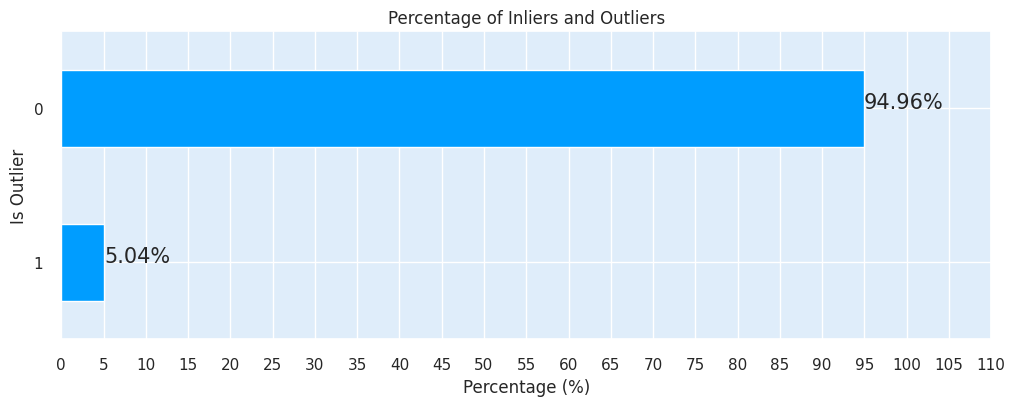

In [ ]:
# Calculate the percentage of inliers and outliers
outlier_percentage = customer_data['Is_Outlier'].value_counts(normalize=True) * 100

# Plotting the percentage of inliers and outliers
plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='#009dff')

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Remove the outliers from the clean dataset
customer_data_cleaned = customer_data[customer_data['Is_Outlier'] == 0]

# Drop the 'Outliers_Scores' and 'Is_Outlier' columns
customer_data_cleaned = customer_data_cleaned.drop(columns=['Outliers_Scores','Is_Outlier'])

# Reset the index of the cleaned dataset
customer_data_cleaned.reset_index(drop=True, inplace=True)

In [ ]:
# Getting the number of rows in the cleaned customer dataset
customer_data_cleaned.shape[0]

753

#One Hot Encoding

In [ ]:
# Use 'get_dummies' to encoding
customer_data_cleaned = pd.get_dummies(customer_data_cleaned,columns=['Main_Region'])
customer_data_cleaned.head()

,Customer ID,Days_Since_Last_Purchase,Total_Transaction,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Day_of_Week,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Main_Region_Central,Main_Region_East,Main_Region_South,Main_Region_West
0,AA-10315,184,5,30,6833.47,1366.694,11,2,1366.694,2341.849436,443.717,0,0,0,1
1,AA-10375,19,9,41,1099.57,122.174444,15,4,137.44625,171.865898,25.818929,0,0,0,1
2,AA-10480,259,4,36,1794.4,448.6,12,1,448.6,543.021067,54.44,0,0,1,0
3,AA-10645,203,6,64,5806.71,967.785,18,2,1161.342,921.963593,-33.609,0,0,0,1
4,AB-10015,415,3,13,901.49,300.496667,6,6,300.496667,274.698494,274.08,0,0,0,1


#Correlation Analysis

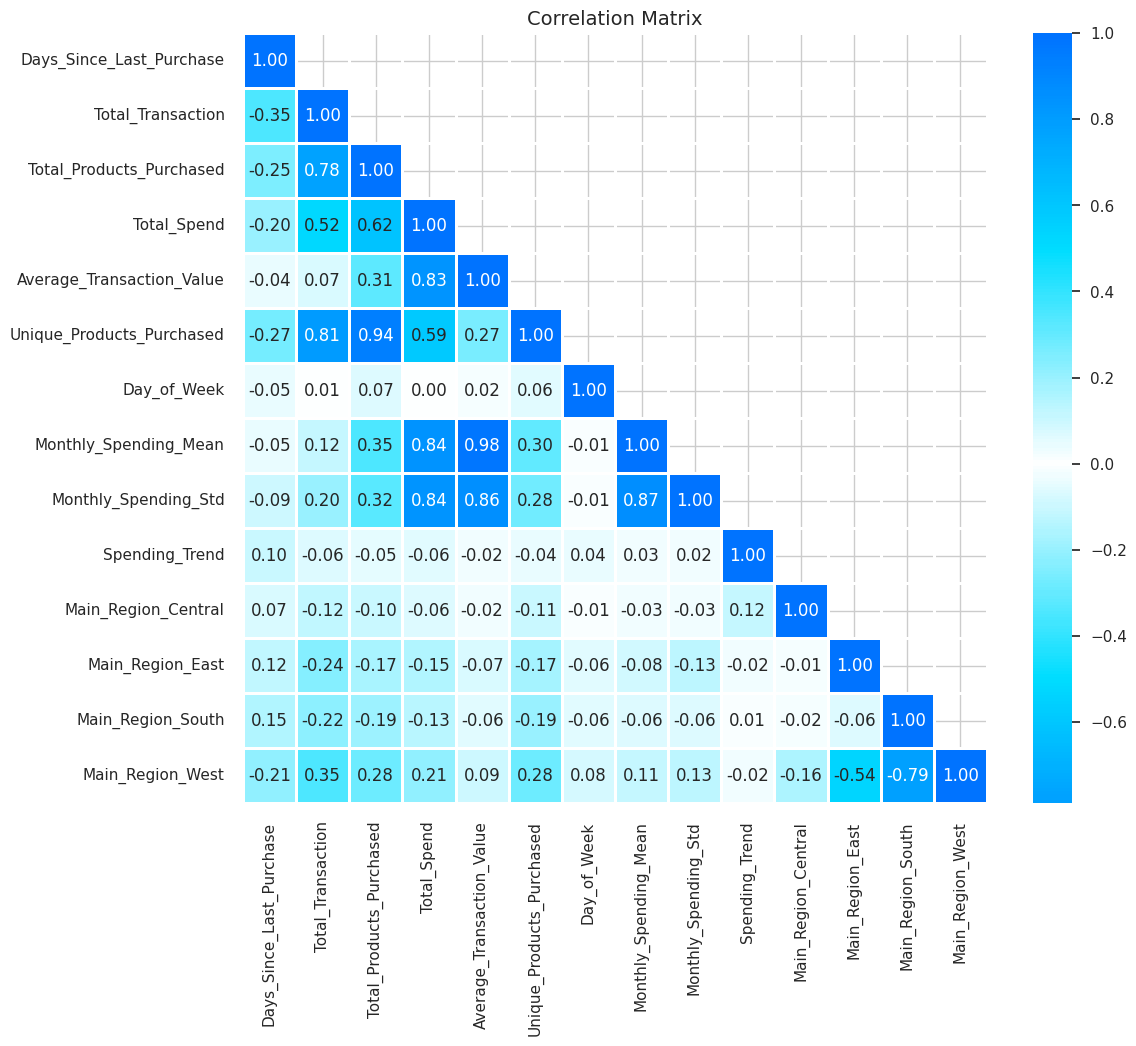

In [ ]:
# Reset background style
sns.set_style('whitegrid')

# Calculate the correlation matrix excluding the 'CustomerID' column
corr = customer_data_cleaned.drop(columns=['Customer ID']).corr()

# Define a custom colormap
colors = ['#0073ff', '#00ddff', 'white', '#00ddff', '#0073ff']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its
# top-left to bottom-right diagonal)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

#Feature Scaling

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that not need to be scaled
columns_to_exclude = ['Customer ID', 'Main_Region_Central','Main_Region_East','Main_Region_South','Main_Region_West']

# List of columns that need to be scaled
columns_to_scale = customer_data_cleaned.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
customer_data_scaled = customer_data_cleaned.copy()

# Applying the scaler to the necessary columns in the dataset
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

# Display the first few rows of the scaled data
customer_data_scaled.head()


,Customer ID,Days_Since_Last_Purchase,Total_Transaction,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Day_of_Week,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Main_Region_Central,Main_Region_East,Main_Region_South,Main_Region_West
0,AA-10315,0.190700,-0.542546,-0.731698,1.446438,2.537700,-0.237054,-0.182877,2.195980,2.841773,1.381961,0,0,0,1
1,AA-10375,-0.807218,1.106443,-0.256166,-0.851822,-1.109897,0.457504,0.979202,-1.074694,-0.867951,0.042271,0,0,0,1
2,AA-10480,0.644300,-0.954793,-0.472317,-0.573321,-0.153167,-0.063414,-0.763916,-0.246803,-0.233437,0.134024,0,0,1,0
3,AA-10645,0.305612,-0.130299,0.738128,1.034893,1.368527,0.978423,-0.182877,1.649597,0.414389,-0.148242,0,0,0,1
4,AB-10015,1.587787,-1.367040,-1.466611,-0.931217,-0.587247,-1.105251,2.141280,-0.640864,-0.692152,0.838142,0,0,0,1


#Dimensionality Reduction

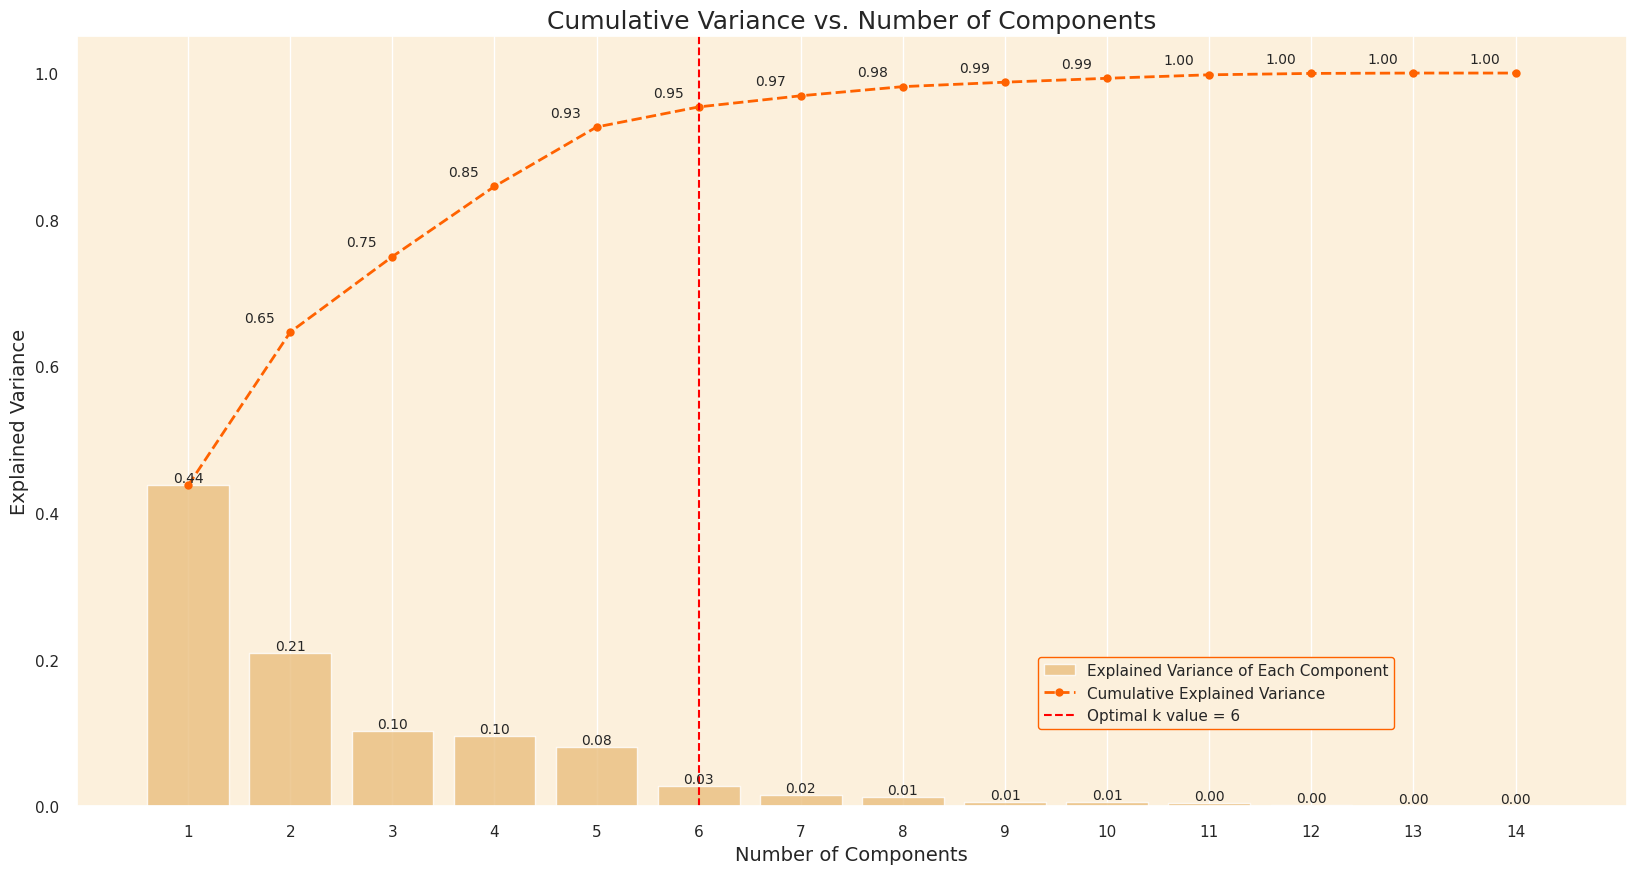

In [ ]:
# Setting Customer ID as the index column
customer_data_scaled.set_index('Customer ID', inplace=True)

# Apply PCA
pca = PCA().fit(customer_data_scaled)

# Calculate the cumulative sum of the explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the optimal k value (based on our analysis, we can choose 6)
optimal_k = 6

# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)

# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}')

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,
           edgecolor='#ff6200')

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')
plt.show()

In [ ]:
# Creating PCA object with 3 components
pca = PCA(n_components=3)

# Fitting and transforming the original data to the new PCA dataframe
customer_data_pca = pca.fit_transform(customer_data_scaled)

# Creating a new dataframe from the PCA dataframe, with columns PCA1, PCA2, PCA2 etc.
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the Customer ID index back to the new PCA dataframe
customer_data_pca.index = customer_data_scaled.index

In [ ]:
# Displaying the resulting dataframe based on the PCs
customer_data_pca.head()

,PC1,PC2,PC3
Customer ID,,,
AA-10315,3.010180,3.599420,0.755309
AA-10375,-1.046653,-2.058962,0.552987
AA-10480,-1.125208,0.675266,-0.277005
AA-10645,2.327531,0.805302,-0.085602
AB-10015,-2.644898,1.241295,2.097018


In [ ]:
# Define a function to highlight the top 3 absolute values in each column of a dataframe
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #ffeacc' if i in top3 else '' for i in column.index]

# Create the PCA component DataFrame and apply the highlighting function
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],
                     index=customer_data_scaled.columns)

pc_df.style.apply(highlight_top3, axis=0)

,PC1,PC2,PC3
Days_Since_Last_Purchase,-0.129243,0.265561,0.201288
Total_Transaction,0.287067,-0.473754,0.003450
Total_Products_Purchased,0.359214,-0.372935,0.084473
Total_Spend,0.452719,0.095550,-0.033949
Average_Transaction_Value,0.380140,0.380615,-0.025243
Unique_Products_Purchased,0.347543,-0.405956,0.082162
Day_of_Week,0.015773,-0.054144,0.612729
Monthly_Spending_Mean,0.390001,0.360317,0.003204
Monthly_Spending_Std,0.382145,0.321759,-0.009054
Spending_Trend,-0.022818,0.082029,0.753626


#K-Means Clustering

##Elbow Method

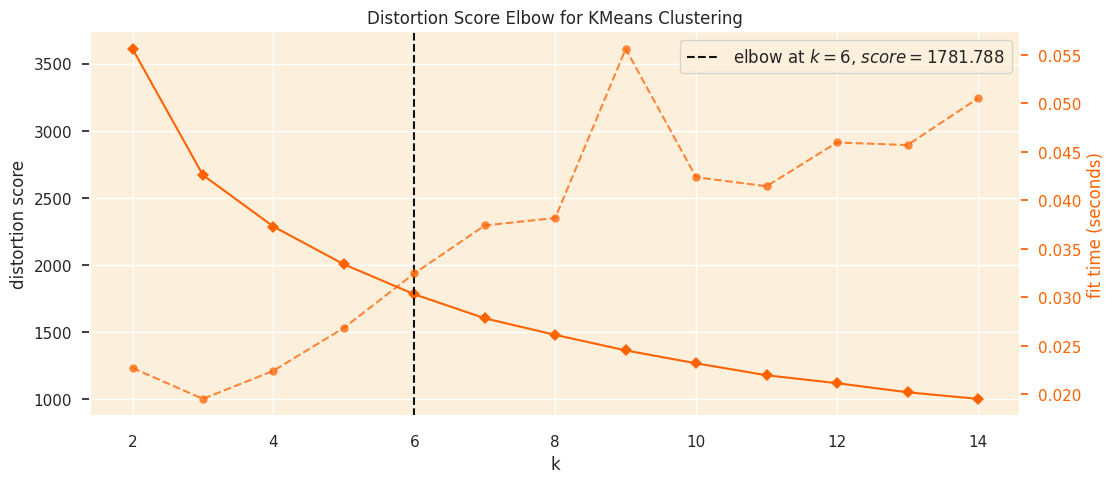

In [ ]:
# Set plot style, and background color
sns.set(style='darkgrid', rc={'axes.facecolor':'#fcf0dc'})

# Set the color palette for plot
sns.set_palette(['#ff6200'])

# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12,5))

# Intsantiate the KElbowVisualizer with the model and range of K values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2,15), timing=False, ax=ax)

# Fit the data to the visualizer
visualizer.fit(customer_data_pca)

# Finalize and render the figure
visualizer.show();

##Silhouette Method

In [ ]:
def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results.
    """

    # Set the size of the figure
    plt.figure(figsize=figsize)

    # Create a grid with (stop_k - start_k + 1) rows and 2 columns
    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)

    # Assign the first plot to the first row and both columns
    first_plot = plt.subplot(grid[0, :])

    # First plot: Silhouette scores for different k values
    sns.set_palette(['darkorange'])

    silhouette_scores = []

    # Iterate through the range of k values
    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)

    # Add the optimal k value text to the plot
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='bottom',
             horizontalalignment='left', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))


    # Second plot (subplot): Silhouette plots for each k value
    colors = sns.color_palette("bright")

    for i in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        # Assign the plots to the second, third, and fourth rows
        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)

        # Add the Silhouette score text to the plot
        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()

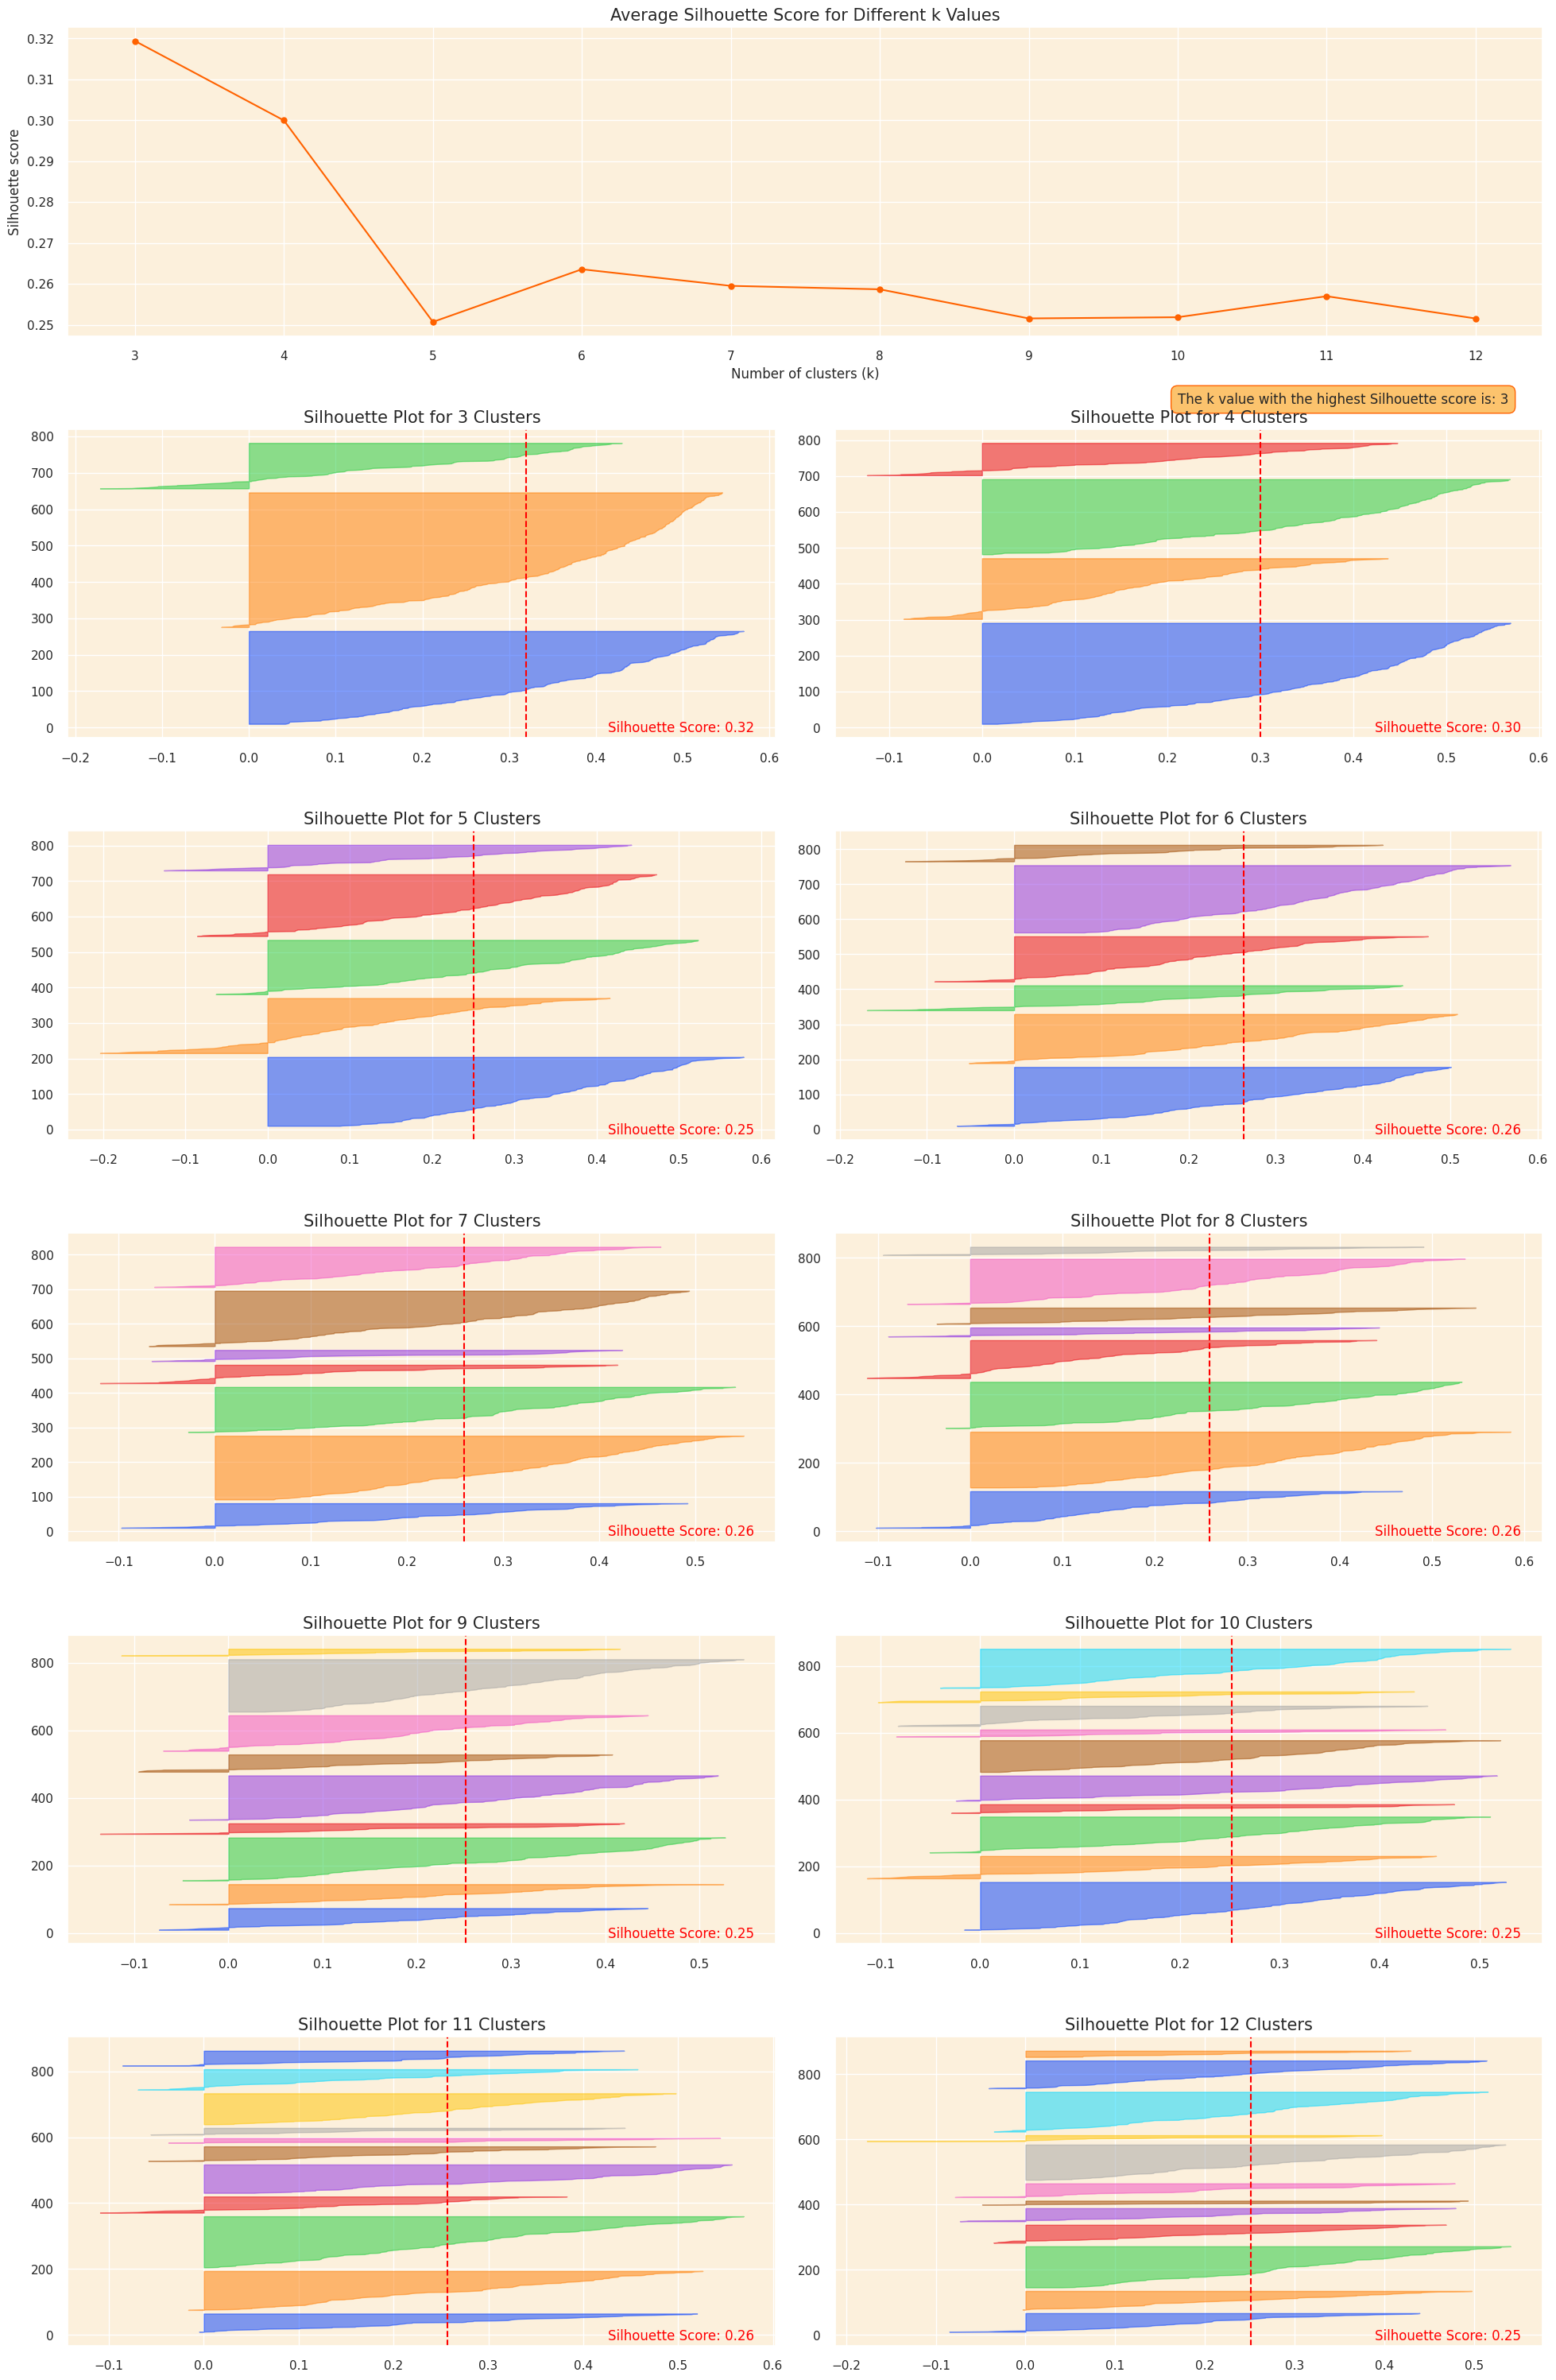

In [ ]:
silhouette_analysis(customer_data_pca, 3, 12, figsize=(20, 50))

##Clustering Model

In [ ]:
# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(customer_data_pca)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in
                 enumerate(cluster_frequencies.most_common())}

# Reverse the mapping to assign labels as per your criteria
label_mapping = {v: k for k, v in {2: 1, 1: 0, 0: 2}.items()}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
customer_data_cleaned['cluster'] = new_labels

# Append the new cluster labels to the PCA version of the dataset
customer_data_pca['cluster'] = new_labels

In [ ]:
# Display the first few rows of the original dataframe
customer_data_cleaned.head()

,Customer ID,Days_Since_Last_Purchase,Total_Transaction,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Day_of_Week,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Main_Region_Central,Main_Region_East,Main_Region_South,Main_Region_West,cluster
0,AA-10315,184,5,30,6833.47,1366.694,11,2,1366.694,2341.849436,443.717,0,0,0,1,0
1,AA-10375,19,9,41,1099.57,122.174444,15,4,137.44625,171.865898,25.818929,0,0,0,1,1
2,AA-10480,259,4,36,1794.4,448.6,12,1,448.6,543.021067,54.44,0,0,1,0,2
3,AA-10645,203,6,64,5806.71,967.785,18,2,1161.342,921.963593,-33.609,0,0,0,1,0
4,AB-10015,415,3,13,901.49,300.496667,6,6,300.496667,274.698494,274.08,0,0,0,1,2


#3D Visualization of Top Principal Components

In [ ]:
# Setting up the color scheme for the clusters (RGB order)
colors = ['#e8000b', '#1ac938', '#023eff']

In [ ]:
# Create separate data frames for each cluster
cluster_0 = customer_data_pca[customer_data_pca['cluster'] == 0]
cluster_1 = customer_data_pca[customer_data_pca['cluster'] == 1]
cluster_2 = customer_data_pca[customer_data_pca['cluster'] == 2]

# Create a 3D scatter plot
fig = go.Figure()

# Add data points for each cluster separately and specify the color
fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'],
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'],
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Cluster 1'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'],
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cluster 2'))

# Set the title and layout details
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

# Show the plot
fig.show()

#Cluster Distribution Visualization

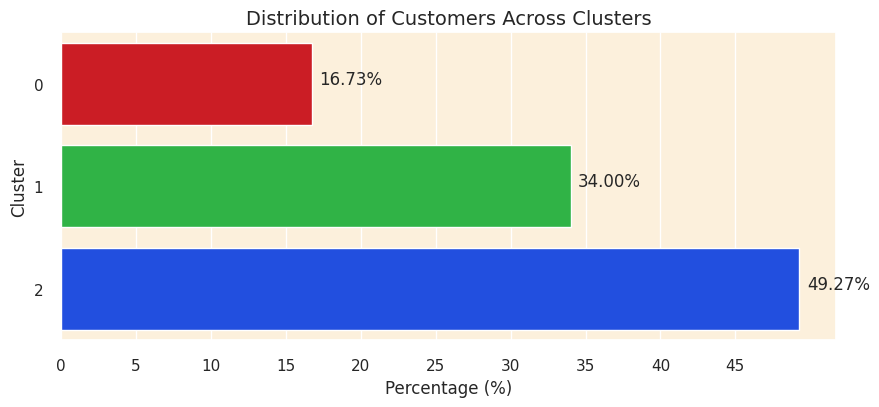

In [ ]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (customer_data_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

#Clustering Evaluation

In [ ]:
# Compute number of customers
num_observations = len(customer_data_pca)

# Separate the features and the cluster labels
X = customer_data_pca.drop('cluster', axis=1)
clusters = customer_data_pca['cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+---------------------+
|         Metric          |        Value        |
+-------------------------+---------------------+
| Number of Observations  |         753         |
|    Silhouette Score     | 0.31932427564505855 |
| Calinski Harabasz Score |  436.7662351203657  |
|  Davies Bouldin Score   | 1.0680987211696038  |
+-------------------------+---------------------+


#Radar Chart Approach

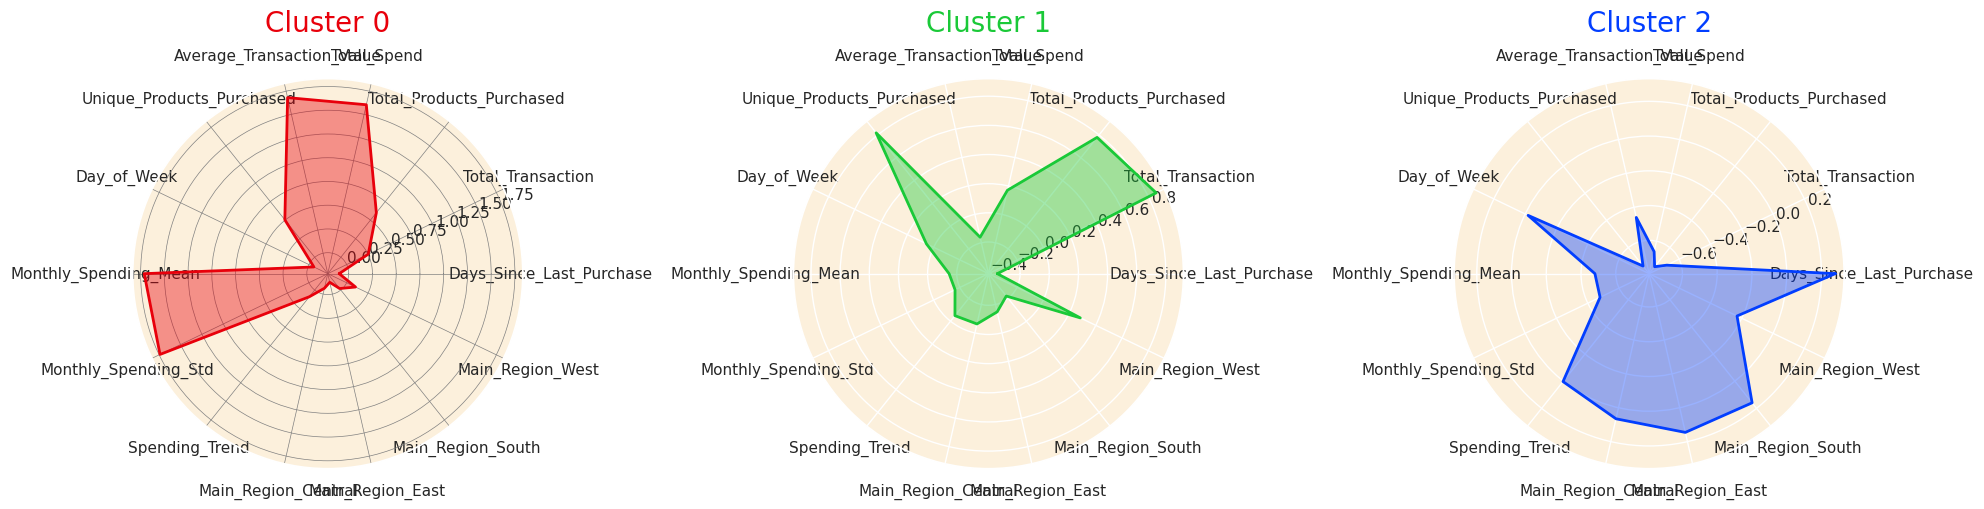

In [ ]:
# Setting 'CustomerID' column as index and assigning it to a new dataframe
df_customer = customer_data_cleaned.set_index('Customer ID')

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['cluster'] = df_customer['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_customer_standardized.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')

    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

# Set data
labels=np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=3)

# Create radar chart for each cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

# Add input data
ax[0].set_xticks(angles[:-1])
ax[0].set_xticklabels(labels[:-1])

ax[1].set_xticks(angles[:-1])
ax[1].set_xticklabels(labels[:-1])

ax[2].set_xticks(angles[:-1])
ax[2].set_xticklabels(labels[:-1])

# Add a grid
ax[0].grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()